In [61]:
import ast

import pandas as pd
import matplotlib.pyplot as plt


In [23]:
movies_metadata = pd.read_csv("data/movies_metadata.csv")
movies_metadata.shape

/tmp/ipykernel_1312170/1855133637.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv("data/movies_metadata.csv")


(45466, 24)

In [24]:
movies_metadata.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [25]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features
- **adult**: indicates whether a movie is for adult viewer only
- **belongs_to_collection**: a dictionary indicating whether a movie belongs to any series/collection
- **budget**: movie's budget in USD
- **genres**: a nested JSON of all the genres related to a movie
- **homepage**: the Official Homepage
- **id**: the ID of the movie
- **imdb_id**: the IMDB ID of the movie
- **original_language**: the language in which the movie was originally filmed in
- **original_title**: the official title of the movie (in original language)
- **overview**: a brief overview
- **popularity**: popularity score assigned by TMDB
- **poster_path**: poster image url
- **production_companies**: a list of production companies involved
- **production_countries**: a list of countries involved
- **release_date**: release date 
- **revenue**: total revenue in USD
- **runtime**: runtime in minutes
- **spoken_languages**: a list of spoken languages in the movie
- **status**: movie's status (Released, Rumored, Post Production, In Production, Planned, and Cancelled etc.)
- **tagline**: movie's tagline
- **title**: the official title of the movie (in English)
- **video**: ?
- **vote_average**: movie's average rating
- **vote_count**: the number of users votes 

In [26]:
movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [27]:
for col in ['genres', 'original_language', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'video']:
    print('-'*50)
    print(f'The column name is: {col}')
    print(movies_metadata[col].value_counts().head(10))

--------------------------------------------------
The column name is: genres
[{'id': 18, 'name': 'Drama'}]                                                                    5000
[{'id': 35, 'name': 'Comedy'}]                                                                   3621
[{'id': 99, 'name': 'Documentary'}]                                                              2723
[]                                                                                               2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                  1301
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                      1135
[{'id': 27, 'name': 'Horror'}]                                                                    974
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]                                  930
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]     593
[{'i

In [28]:
# `adult` feature is useless as heavilty imbalanced (only 9 adult movies)

In [29]:
movies_metadata[movies_metadata['revenue'] == 0].shape[0]  # 38052 samples show revenue as 0, I assume that means we don't know the revenue for those movies

38052

In [30]:
movies_metadata["popularity"] = pd.to_numeric(movies_metadata["popularity"], errors="coerce")
movies_metadata[["title", "popularity"]].sort_values("popularity", ascending=False).head(10)

,title,popularity
30700,Minions,547.488298
33356,Wonder Woman,294.337037
42222,Beauty and the Beast,287.253654
43644,Baby Driver,228.032744
24455,Big Hero 6,213.849907
26564,Deadpool,187.860492
26566,Guardians of the Galaxy Vol. 2,185.330992
14551,Avatar,185.070892
24351,John Wick,183.870374
23675,Gone Girl,154.801009


In [31]:
movies_metadata["vote_count"] = pd.to_numeric(movies_metadata["vote_count"], errors="coerce")
movies_metadata[["title", "vote_count"]].sort_values("vote_count", ascending=False).head(10)

,title,vote_count
15480,Inception,14075.0
12481,The Dark Knight,12269.0
14551,Avatar,12114.0
17818,The Avengers,12000.0
26564,Deadpool,11444.0
22879,Interstellar,11187.0
20051,Django Unchained,10297.0
23753,Guardians of the Galaxy,10014.0
2843,Fight Club,9678.0
18244,The Hunger Games,9634.0


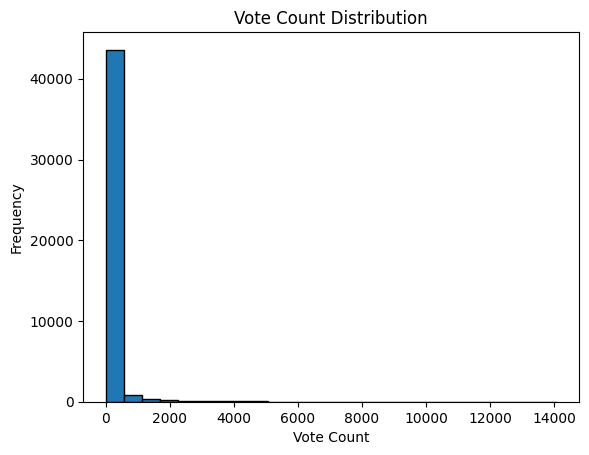

In [40]:
plt.hist(movies_metadata["vote_count"], bins=25, edgecolor='black')

# Add title and labels
plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

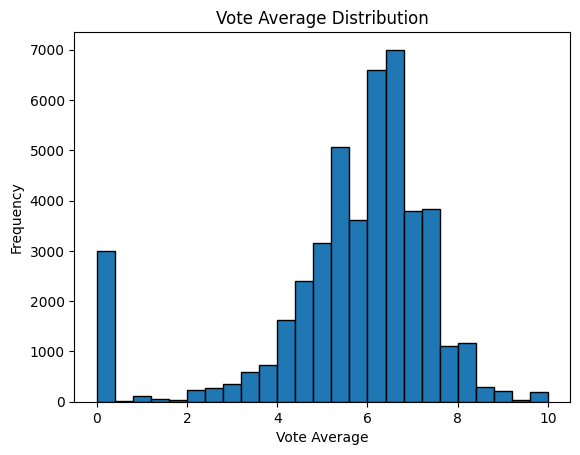

In [39]:
movies_metadata["vote_average"] = pd.to_numeric(movies_metadata["vote_average"], errors="coerce")

plt.hist(movies_metadata["vote_average"], bins=25, edgecolor='black')

# Add title and labels
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [42]:
credits_df = pd.read_csv("data/credits.csv")
credits_df.shape

(45476, 3)

In [43]:
credits_df

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


#### Credits Dataset
- **cast**: a JSON of cast names and the characters they played
- **crew**: a JSON of crew names and the function they performed
- **id**: a TMDB ID of a movie

In [46]:
credits_df["id"].isnull().sum()

0

In [54]:
movies_metadata["id"] = pd.to_numeric(movies_metadata["id"], errors="coerce")
movies_metadata.drop(["adult", "video", "homepage", "original_title", "overview", "poster_path", "tagline"], axis=1, inplace=True)

In [56]:
df = movies_metadata.merge(credits_df, on="id")

In [62]:
df["cast"] = df["cast"].apply(ast.literal_eval)
df["crew"] = df["crew"].apply(ast.literal_eval)

def get_director(row):
    for elem in row:
        if elem["job"] == "Director":
            return elem["name"]
        
    return None

df["director"] = df["crew"].apply(get_director)

In [65]:
df["director"].describe()

count         44651
unique        17572
top       John Ford
freq             66
Name: director, dtype: object

In [68]:
df["director"].value_counts().head(15)

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        51
Woody Allen           49
Jean-Luc Godard       47
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
Henry Hathaway        42
William A. Wellman    42
George Cukor          41
Richard Thorpe        40
Martin Scorsese       40
Name: director, dtype: int64